# Implémentation de la méthode Crank-Nicolson

# Introduction

Dans cette section, nous allons implémenter la méthode de Crank-Nicolson avec les données mises à dispostion. Par conséquent, un traitement de ces données est requis en premier lieu. Celui-ci se fera par cycle : journée et année. Il sera aussi nécessaire de déterminer la température moyenne avec les données mises à disposition. Cela servira à avoir une des températures limites, Td. En effet, on choisira comme conditions limites et initiales ceux de Dirichlet, ce qui signifie : 

- T(x,0) = T0 (condition initiale) et cela pour x (température homogène)
- T(0,t) = Tg (condition à l'extrémité) et cela pour t 
- T(L,t) = Td (condition à l'extrémité) et cela pour t  

Avec T0, Tg et Td des températures constantes.

Puis après, nous mettrons en place la résolution numérique en utilisant la méthode implicite de Crank-Nicolson.

NB : Pour simplifier le problème, la structure des cycles sera comme ceci : 1 année = 12 mois, 1 mois = 30 jours, 1 jour = 24 heures.

Tout d'abord avant de commencer à travailler, importons les libraires et les variables dont on aura besoin.

In [1]:
#importation des librairies 
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import math

On récupère les données dans les fichiers sources et on les sauvegarde dans des listes pour pouvoir les traiter : 

In [2]:
#Algérie 
list_Alg = []

with open("Donnees/temperatures_algeria_1.txt","r") as algerie_1:
    line = algerie_1.readline()
    while line != "":
        data = float(line)
        list_Alg.append(data)
        line = algerie_1.readline()

#France
list_Fr = []

with open("Donnees/temperatures_france_1.txt","r") as france_1:
    
    line = france_1.readline()
    while line != "":
        data = float(line)
        list_Fr.append(data)
        line = france_1.readline()

On déclare les dictionnaires de stockages pour chacun des cycles avec cette structure : [Pays][Mois][Jour][Valeur]. On déclare aussi un dictionnaire de mois qui nous permettra de manipuler cette structure.

In [3]:
#Dictionnaire de ce mois.
dict_months = {1 : "janvier",
    2 : "février",
    3 : "mars",
    4 : "avril",
    5 : "mai",
    6 : "juin",
    7 : "juillet",
    8 : "août",
    9 : "septembre",
    10 : "octobre",
    11 : "novembre",
    12 : "décembre"}

#Cycle sur une année, structure du dict : [Pays][Mois][Jour][Moyenne des températures de ce jour]
list_years = {"Algérie":{
"janvier": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"février": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"mars": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"avril": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"mai": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"juin": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"juillet": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"août": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"septembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"octobre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"novembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"décembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
}},"France":{
"janvier": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"février": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"mars": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"avril": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"mai": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"juin": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"juillet": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"août": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"septembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"octobre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"novembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
},"décembre": {1 : 0.0,
2 : 0.0,
3 : 0.0,
4 : 0.0,
5 : 0.0,
6 : 0.0,
7 : 0.0,
8 : 0.0,
9 : 0.0,
10 : 0.0,
11 : 0.0,
12 : 0.0,
13 : 0.0,
14 : 0.0,
15 : 0.0,
16 : 0.0,
17 : 0.0,
18 : 0.0,
19 : 0.0,
20 : 0.0,
21 : 0.0,
22 : 0.0,
23 : 0.0,
24 : 0.0,
25 : 0.0,
26 : 0.0,
27 : 0.0,
28 : 0.0,
29 : 0.0,
30 : 0.0,
}}}

#Cycle sur une journée, structure du dict : [Pays][Mois][Jour][Liste des températures sur ce jour]
list_days = {"Algérie":{
"janvier": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"février": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"mars": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"avril": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"mai": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"juin": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"juillet": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"août": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"septembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"octobre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"novembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"décembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
}},"France":{
"janvier": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"février": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"mars": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"avril": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"mai": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"juin": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"juillet": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"août": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"septembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"octobre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"novembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
},"décembre": {1 : [],
2 : [],
3 : [],
4 : [],
5 : [],
6 : [],
7 : [],
8 : [],
9 : [],
10 : [],
11 : [],
12 : [],
13 : [],
14 : [],
15 : [],
16 : [],
17 : [],
18 : [],
19 : [],
20 : [],
21 : [],
22 : [],
23 : [],
24 : [],
25 : [],
26 : [],
27 : [],
28 : [],
29 : [],
30 : [],
}}}

# Détermination de Td pour le cycle annuel

Ici, nous allons faire la moyenne des températures sur une année, i.e sommer toutes les températures puis diviser par le nombre d'éléments sommés. Cela nous servira à déterminer une des températues limites pour le cycle annuel: Td. Pour le cycle de journée, on implémentara directement la solution dans la résolution.

In [4]:
dict_Td = {"Algérie":[], "France":[]}

dict_Td['Algérie'] = np.mean(list_Alg)
dict_Td['France'] = np.mean(list_Fr)

# Cycle sur une journée :

Ici, nous allons ranger les températures correctement dans le dictionnaire list_days. C'est-à-dire que pour chaque liste représentant une journée, il faut qu'il y est 24 valeurs dans celle-ci, correspondant aux températures à chaque heure de ce jour. On rappelle qu'on considère qu'un mois = 30 j.  

In [5]:
#Algérie
i = 1
j = 1
temp_list = []

for data in list_Alg:
    if i == 31:
        j += 1
        i = 1
    if j == 13:
        break
    if len(temp_list) == 24:
        list_days['Algérie'][dict_months[j]][i] = list(temp_list)
        temp_list.clear()
        i += 1
    temp_list.append(data)

#France
i = 1
j = 1
temp_list.clear()

for data in list_Fr:
    if i == 31:
        j += 1
        i = 1
    if j == 13:
        break
    if len(temp_list) == 24:
        list_days['France'][dict_months[j]][i] = list(temp_list)
        temp_list.clear()
        i += 1
    temp_list.append(data)
temp_list.clear()

# Cycle sur une année 

Ici, nous allons faire la moyenne des températures sur une journée, i.e sommer toutes les températures d'une journée puis diviser par le nombre d'éléments sommés. Pour cela, nous allons utiliser list_days.

In [6]:
#Algérie
i = 1
j = 1

for j in range(1,13):
    for i in range(1,31):
        list_years['Algérie'][dict_months[j]][i] = np.mean(list_days['Algérie'][dict_months[j]][i])


#France
i = 1
j = 1

for j in range(1,13):
    for i in range(1,31):
        list_years['France'][dict_months[j]][i] = np.mean(list_days['France'][dict_months[j]][i])

On va aussi au meme moment déterminer les températures min/max pour chacun des pays. Ces valeurs seront nécessaires pour l'affichage de la colorbar après. 

In [7]:
#déclaration des variables de stockages
max_alg = 0.0
min_alg = min([i for i in list_years['Algérie'][dict_months[1]].values()])  

max_fr = 0.0
min_fr = 0.0 

j = 1

for j in range(1,13):
    
        a = max([i for i in list_years['Algérie'][dict_months[j]].values()]) 
        if(a > max_alg):
            max_alg = a
        
        a = min([i for i in list_years['Algérie'][dict_months[j]].values()]) 
        if(a < min_alg):
            min_alg = a
            
        a = max([i for i in list_years['France'][dict_months[j]].values()]) 
        if(a > max_fr):
            max_fr = a
        
        a = min([i for i in list_years['France'][dict_months[j]].values()]) 
        if(a < min_fr):
            min_fr = a

# Implémentation du schéma de Crank-Nicolson (essai)

Dans cette partie, nous allons enfin mettre en place la résolution numérique de l'équation de chaleur suivant le schéma implicite de Crank-Nicolson. 

Nous devons dans un premier temps, déclarer les constantes physiques, les paramètres de la simulation et une fonction tridiag permettant de créer une matrice triadiagonale : 

In [8]:
#fonction tridiagonale 
def tridiag(n,c1,c2):
    M = np.zeros((n+1,n+1),float)
    M[0,0] = M[n,n] = 1 #Pour garder constant les températures limites
    for i in range(1,n):
        M[i,i] = c2
        M[i,i-1] = M[i,i+1] = -c1
    return M

#Constantes physiques et paramétres de la simulation : 

#Algérie (sable sec) (En Kelvin)
lamb_Alg = 0.396 #conductivité thermique
rho_c_Alg = 1.45e6 #Capacité thermique volumétrique

D_Alg = lamb_Alg/rho_c_Alg #diffusivité thermique 

#France (Terre sèche) (En Kelvin)
lamb_Fr = 0.321 #conductivité thermique
rho_c_Fr = 1350e3 #capacité thermique volumétrique

D_Fr = lamb_Fr/rho_c_Fr #diffusivité thermique 

#paramètres de l'expérience
t_fin = 3600.0 #durée de l'expérience en seconde
L = 5.0 #profondeur de la colonne de terre en mètre

#pas de discrétisation
dx = 1.0e-2
dt = 1.0e-1

#paramètres du maillage
Nx = int(L/dx)
Nt = int(t_fin/dt)

#coefficient de discrétisation
alpha = (D_Alg*dt)/(2*dx*dx)

Le choix des pas de discrétisation n'est pas anodin. En effet, au vu de la très faible diffusivité (de l'ordre de 1e-7) pour chacun des deux pays, la diffusion thermique se fera de façon très lente. D'ou la possibilité d'utiliser un pas temporel grand, car on ne perdra que très peu de précision. 

Concernant le pas de distance, on le fixe pour le moment à 5 mètres, car on suppose que la variation de température devient négligeable à partir de 5-10 m et qu'elle vaut Td. De plus au vu de la faible diffusivité, 5 m ou 10 cela ne changera rien à la résolution. Prendre 10 m ne fera que rallonger la zone au milieu de la colonne de terre. 

Pour ce qui est de t_fin : 

- t_fin = 3600 s (cycle journée)
- t_fin = 24h = 86 400 s (cycle annuel)

Pourquoi ? Car sur le cycle journée, on résout heure par heure donc chaque résolution se fait en 1h soit 3600 s. Pour le cycle annuel c'est la meme logique mais cela se fait jour par jour donc t_fin = 86 400 s = 24h.

Ainsi, on gardera le meme L et le meme pas dx, car pour chaque cycle, la résolution se fait sur la meme profondeur. Concernant dt, il faudra faire un choix : 

- cycle journée = 1.0e-1
- cycle annuel = 2.4 (pour avoir le meme nombre Nt de discrétisations que le cycle jour)

Le pas dt pour le cycle annuel est plus grand, donc on a moins de précisions. Mais ce n'est pas un problème, car la durée d'une journée compensera ce manque de précision sans oublier la faible diffusivité avec laquelle on travaille.

De plus c'est aussi le meilleur rapport précision/temps de rendu, car le schéma de Crank Nicolson est implicite il est donc très long et passer un certain seuil de points de discrétisation, le rendu met énormément de temps. 

Implémentation du schéma C-N (essai) : 

In [9]:
#conditions aux limites et initiales (En Celsius)
T0 = (list_days['Algérie'][dict_months[1]][1][1] + dict_Td['Algérie'])/2 
Tg = list_days['Algérie'][dict_months[1]][1][1] 
Td = dict_Td['Algérie']

#matrice du schéma de Crank-Nicolson (ATn+1 = BTn)
A = tridiag(Nx,alpha,1+2*alpha)
B = tridiag(Nx,-alpha,1-2*alpha)

#déclaration du vecteur température stockant le résultat de la résolution
T = np.zeros((Nt+1,Nx+1),float)

#Conditions initiales
T[0,:] = T0*np.ones(Nx+1,float)

#Conditions aux limites
T[:,0] = Tg*np.ones(Nt+1,float)   #bord gauche
T[:,Nx] = Td*np.ones(Nt+1, float) #bord droit

#schéma de Crank-Nicolson
for t in range(0,Nt):
    T[t+1,:] = np.linalg.solve(A,np.dot(B,T[t,:]))
       
#Affichage à 3 moments distincts pour vérifier
print(T[0,:])
print(T[int(Nt/2),:])
print(T[Nt,:])

[ 2.36525767 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854 13.71960854
 13.71960854 13.71960854 13.71960854 13.71960854 13

# Différentes méthodes d'affichages 

Dans cette partie, nous allons mettre en place différents moyens d'affichages pour les résultats. 

Affichage en graphique en 2D à trois moments différents :  

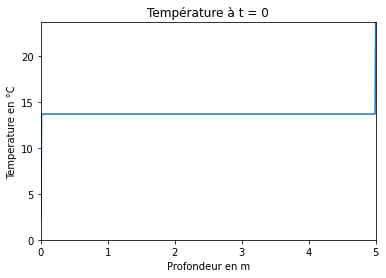

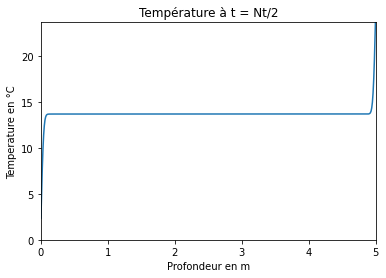

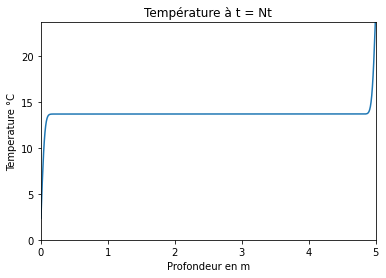

In [10]:
#Affichage à trois moments distinscts de la température en fonction de la profondeur

x = np.linspace(0.0,L,Nx+1)

#Au début de la simulation
ax = plt.axes(xlim=(0, L), ylim=(0, T0+10))
ax.set_xlabel('Profondeur en m')
ax.set_ylabel('Temperature en °C')
ax.set_title('Température à t = 0')
plt.plot(x,T[0,:])
plt.show()

#Au milieu de la simulation
ax = plt.axes(xlim=(0, L), ylim=(0, T0+10))
ax.set_xlabel('Profondeur en m')
ax.set_ylabel('Temperature en °C')
ax.set_title('Température à t = Nt/2')
plt.plot(x,T[int(Nt/2),:])
plt.show()

#A la fin de la simulation
ax = plt.axes(xlim=(0, L), ylim=(0, T0+10))
ax.set_xlabel('Profondeur en m')
ax.set_ylabel('Temperature °C')
ax.set_title('Température à t = Nt')
plt.plot(x,T[Nt,:])
plt.show()

Affichage en 3D avec dégradé de couleur (heatmap): 

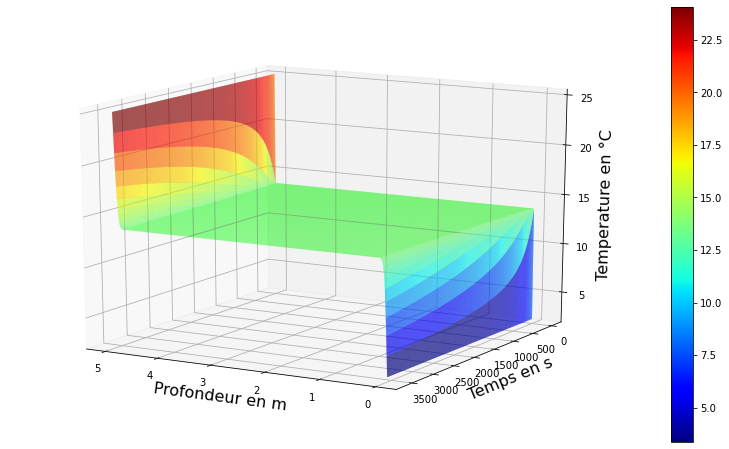

In [11]:
#Vecteurs pour le graphique
x = np.linspace(0,L,Nx+1)
t = np.linspace(0.0, t_fin,Nt+1)
Sx,St = np.meshgrid(x,t)

# affichage de l'évolution de la température
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Profondeur en m', fontsize = 16)
ax.set_ylabel('Temps en s', fontsize = 16)
ax.set_zlabel('Temperature en °C', fontsize = 16)
ax.view_init(elev=15, azim = 120)

norm = colors.Normalize(min(Tg,Td,T0),max(Tg,Td,T0))
p = ax.plot_surface(Sx,St,T,cstride=1,linewidth=0,cmap='jet')
cb = fig.colorbar(p,ax = ax)

Affichage en 2D en GIF (ATTENTION : Le code plantera si le codec ffmpeg n'est pas correctement installé !) :

In [12]:
#affichage de l'évolution en 2D avec animation
x = np.linspace(0,L,Nx+1)
fig = plt.figure()
ax = plt.axes(xlim=(0, L), ylim=(0, T0+10))
ax.set_xlabel('Profondeur en m')
ax.set_ylabel('Temperature en °C')
ax.set_title('Température selon la profondeur en GIF')
line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, T[i,:])
    return line,

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=np.arange(0, Nt, 50),interval=40,blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())

Affichage 2D avec dégradé en couleur (heatmap) : 

Text(0.5, 1.0, 'Température à 3600.0 s')

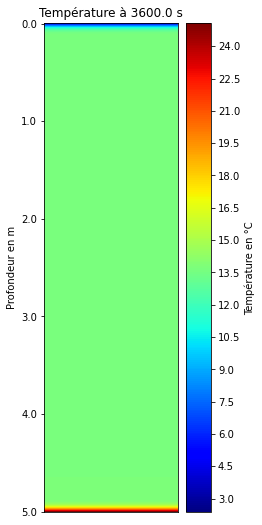

In [13]:
x = np.linspace(0,L,Nx+1)
t = np.linspace(0.0, t_fin,Nt+1)

x = np.round(x,2)
t = np.round(t,5)

y = np.arange(T[Nt,:].shape[0])
my_yticks = x
frequency = 100

data = np.vstack(T[Nt,:])
df = pd.DataFrame(data)

fig = plt.figure(figsize=(3,9))
titre = f"Température à {t[Nt]} s"
plt.ylabel('Profondeur en m')
plt.yticks(y[::frequency], my_yticks[::frequency])
im = plt.imshow(df, cmap='jet', aspect ='auto', interpolation='bilinear')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Température en °C')
plt.title(titre)

Ici on perd beaucoup trop d'informations à cause de l'échelle du graphique qui est plus grande que les zones ayant des importantes variations de températures. Voici, donc une autre version qui tronque la zone ou la température reste constante : 

Text(0.5, 1.0, 'Température à 3600.0 s')

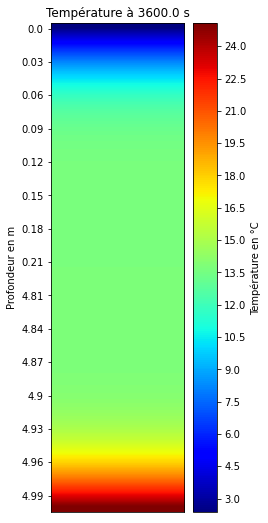

In [14]:
def dict_unique(d):
    result = {}
    for key,value in d.items():
        if value not in result.values():
            result[key] = value
    return result

temp = T[Nt,:]
dict_temp = {np.round(i*dx,2) : temp[i] for i in range(0, len(temp))}

for k, v in dict_temp.items():
            dict_temp[k] = round(v, 4)
        
dict_temp = dict_unique(dict_temp)

temp = np.round(temp,4)
_, idx = np.unique(temp, return_index=True)
temp = temp[np.sort(idx)]

x = np.fromiter(dict_temp.keys(), dtype=float)
t = np.linspace(0.0, t_fin,Nt+1)

t = np.round(t,5)

y = np.arange(temp.shape[0])
my_yticks = x
frequency = 3

data = np.vstack(temp)
df = pd.DataFrame(data,index = x)

fig = plt.figure(figsize=(3,9))
titre = f"Température à {t[Nt]} s"
plt.ylabel('Profondeur en m')
plt.yticks(y[::frequency], my_yticks[::frequency])
im = plt.imshow(df, cmap='jet', aspect ='auto', origin = 'upper', interpolation='bilinear')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Température en °C')
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()
plt.title(titre)

# Conclusion : 

Au vu de la lenteur de la diffusion de la température à travers la colonne de terre, nous opterons pour l'affichage en 3D ou/et bien le dégradé de couleur en 2D. En effet, prendre sur 3 moments distincts ou bien faire un GIF du graphe ne sont pas des moyens adaptés refletant le phénomène que nous étudions. Ainsi, pour faire un GIF de la heatmap en 2D, on sauvegardera image par image les différentes heatmaps pour en faire un GIF en utilisant un logiciel externe (comme par exemple ImageMagickDisplay) ou bien un site en ligne (e.g https://ezgif.com/maker).    

# Implémentation cycle annuel 

Maintenant que nous avons pu essayer le schéma de Crank-Nicolson une première fois, nous allons l'implémenter pour le cycle annuel. Pour l'affichage, nous opterons un dégradé en 2D en couleur et on engistrera pour chaque jour, l'image du graphe associé en fin de simulation donc à t = 3600 s. Pour cela, une boucle for est nécessaire. T0 sera la moyenne du vecteur T[Nt,:] de la simulation précédente. Concernant Td il restera le meme durant toute la simulation et Tg sera la moyenne de la température du jour simulé. Le reste des paramètres (comme le pas) resteront identiques pour les deux pays étudiés.

# Algérie : 

In [59]:
#Constantes physiques et paramétres de la simulation : 

#Algérie (sable sec) (En Kelvin)
lamb_Alg = 0.396 #conductivité thermique
rho_c_Alg = 1.45e6 #Capacité thermique volumétrique

D_Alg = lamb_Alg/rho_c_Alg #diffusivité thermique 

#paramètres de l'expérience
t_fin = 86400 #durée de l'expérience en seconde
L = 5.0 #profondeur de la colonne de terre en mètre

#pas de discrétisation
dx = 1.0e-2
dt = 2.4

#paramètres du maillage
Nx = int(L/dx)
Nt = int(t_fin/dt)

#Température limite
Td = dict_Td['Algérie']

#coefficient de discrétisation
alpha = (D_Alg*dt)/(2*dx*dx)

#matrice du schéma de Crank-Nicolson (ATn+1 = BTn)
A = tridiag(Nx,alpha,1+2*alpha)
B = tridiag(Nx,-alpha,1-2*alpha)

#compteur pour la save des plots
index = 0

#boucle pour le cycle : calcul pour chaque température dans list_years puis on engistre le résultat
for i in range(1,13):
    for j in range(1,31):
        if(i == 1 and j == 1): 
            T0 = (list_years['Algérie'][dict_months[1]][1] + dict_Td['Algérie'])/2 
        else:
            T0 = np.mean(T[Nt,:])
        
        Tg = list_years['Algérie'][dict_months[i]][j]
            
        #déclaration du vecteur température stockant le résultat de la résolution
        T = np.zeros((Nt+1,Nx+1),float)

        #Conditions initiales
        T[0,:] = T0*np.ones(Nx+1,float)

        #Conditions aux limites
        T[:,0] = Tg*np.ones(Nt+1,float)   #bord gauche
        T[:,Nx] = Td*np.ones(Nt+1, float) #bord droit

        #schéma de Crank-Nicolson
        for t in range(0,Nt):
            T[t+1,:] = np.linalg.solve(A,np.dot(B,T[t,:]))
        
        #Affichage, puis on save
        temp = T[Nt,:]
        dict_temp = {np.round(i*dx,2) : temp[i] for i in range(0, len(temp))}

        for k, v in dict_temp.items():
                    dict_temp[k] = round(v, 4)

        dict_temp = dict_unique(dict_temp)

        temp = np.round(temp,4)
        _, idx = np.unique(temp, return_index=True)
        temp = temp[np.sort(idx)]

        x = np.fromiter(dict_temp.keys(), dtype=float)
        t = np.linspace(0.0, t_fin,Nt+1)

        t = np.round(t,5)

        y = np.arange(temp.shape[0])
        my_yticks = x
        frequency = 10

        data = np.vstack(temp)
        df = pd.DataFrame(data,index = x)

        fig = plt.figure(figsize=(3,9))
        titre = f"Température le {j} du mois de {dict_months[i]} en Algérie"
        plt.ylabel('Profondeur en m')
        plt.yticks(y[::frequency], my_yticks[::frequency])
        im = plt.imshow(df, cmap='jet', aspect ='auto', origin = 'upper', interpolation='bilinear')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        plt.clim(min_alg, max_alg)
        cb = plt.colorbar()
        cb.set_label('Température en °C')
        plt.title(titre)
        tick_locator = ticker.MaxNLocator(nbins=20)
        cb.locator = tick_locator
        cb.update_ticks()
        index = index + 1
        plt.savefig(f"yr_alg_{index}.png",bbox_inches='tight')
        plt.close()        

# France

In [48]:
#Constantes physiques et paramétres de la simulation : 

#France (Terre sèche) (En Kelvin)
lamb_Fr = 0.321 #conductivité thermique
rho_c_Fr = 1350e3 #capacité thermique volumétrique

D_Fr = lamb_Fr/rho_c_Fr #diffusivité thermique 

#paramètres de l'expérience
t_fin = 86400 #durée de l'expérience en seconde
L = 5.0 #profondeur de la colonne de terre en mètre

#pas de discrétisation
dx = 1.0e-2
dt = 2.4

#paramètres du maillage
Nx = int(L/dx)
Nt = int(t_fin/dt)

#Température limite
Td = dict_Td['France']

#coefficient de discrétisation
alpha = (D_Fr*dt)/(2*dx*dx)

#matrice du schéma de Crank-Nicolson (ATn+1 = BTn)
A = tridiag(Nx,alpha,1+2*alpha)
B = tridiag(Nx,-alpha,1-2*alpha)

#déclaration du vecteur température stockant le résultat de la résolution
T = np.zeros((Nt+1,Nx+1),float)

#compteur pour la save des plots
index = 0

#boucle pour le cycle : calcul pour chaque température dans list_years puis on engistre le résultat
for i in range(1,13):
    for j in range(1,31):
        if(i == 1 and j == 1): 
            T0 = (list_years['France'][dict_months[1]][1] + dict_Td['France'])/2 
        else:
            T0 = np.mean(T[Nt,:])
        
        Tg = list_years['France'][dict_months[i]][j]
            
        #déclaration du vecteur température stockant le résultat de la résolution
        T = np.zeros((Nt+1,Nx+1),float)

        #Conditions initiales
        T[0,:] = T0*np.ones(Nx+1,float)

        #Conditions aux limites
        T[:,0] = Tg*np.ones(Nt+1,float)   #bord gauche
        T[:,Nx] = Td*np.ones(Nt+1, float) #bord droit

        #schéma de Crank-Nicolson
        for t in range(0,Nt):
            T[t+1,:] = np.linalg.solve(A,np.dot(B,T[t,:]))
        
        #Affichage, puis on save
        temp = T[Nt,:]
        dict_temp = {np.round(i*dx,2) : temp[i] for i in range(0, len(temp))}

        for k, v in dict_temp.items():
                    dict_temp[k] = round(v, 4)

        dict_temp = dict_unique(dict_temp)

        temp = np.round(temp,4)
        _, idx = np.unique(temp, return_index=True)
        temp = temp[np.sort(idx)]

        x = np.fromiter(dict_temp.keys(), dtype=float)
        t = np.linspace(0.0, t_fin,Nt+1)

        t = np.round(t,5)

        y = np.arange(temp.shape[0])
        my_yticks = x
        frequency = 10

        data = np.vstack(temp)
        df = pd.DataFrame(data,index = x)

        fig = plt.figure(figsize=(3,9))
        titre = f"Température le {j} du mois de {dict_months[i]} en France"
        plt.ylabel('Profondeur en m')
        plt.yticks(y[::frequency], my_yticks[::frequency])
        im = plt.imshow(df, cmap='jet', aspect ='auto', origin = 'upper', interpolation='bilinear')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        plt.clim(min_fr, max_fr)
        cb = plt.colorbar()
        cb.set_label('Température en °C')
        tick_locator = ticker.MaxNLocator(nbins=20)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.title(titre)
        index = index + 1
        plt.savefig(f"yr_fr_{index}.png",bbox_inches='tight')
        plt.close()        

# Implémentation cycle journée

Pour le cycle journée, nous allons faire une fonction qui selon le pays, le mois et le jour, va calculer la température sur ce jour, sur les 24h. 

In [15]:
#paramètres de l'expérience
t_fin = 3600.0 #durée de l'expérience en seconde
L = 5.0 #profondeur de la colonne de terre en mètre

#pas de discrétisation
dx = 1.0e-2
dt = 1.0e-1

#On rappelle la structure pour pouvoir utiliser la fonction : 

#[str] pays = Algérie ou France
#[int} mois = 1 : janvier , 2 : février etc.. 12 : décembre
#[int] jour = 1 ... 30 du mois
#D = diffusivité
#dx,dt = pas de discrétisations
#t_fin = durée de la simulation en sec
#L = profondeur de la colonne de terre en m

def cn_days(pays,mois,jour,D,t_fin,L,dx,dt):
    
    #coefficient de discrétisation
    alpha = (D*dt)/(2*dx*dx)
    
    #paramètres du maillage
    Nx = int(L/dx)
    Nt = int(t_fin/dt)
    
    #déclaration du vecteur température stockant le résultat de la résolution
    T = np.zeros((Nt+1,Nx+1),float)
    
    #matrice du schéma de Crank-Nicolson (ATn+1 = BTn)
    A = tridiag(Nx,alpha,1+2*alpha)
    B = tridiag(Nx,-alpha,1-2*alpha)
    
    #liste des heures de ce jour
    l_jours = list_days[pays][dict_months[mois]][jour]
    
    #max,min pour plt.clim
    max_ = max(l_jours)
    min_ = min(l_jours)
    
    #conditions aux limites
    Td = np.mean(l_jours)

    #boucle pour le cycle : calcul pour chaque température dans l_jours puis on engistre le résultat
    for i in range(0,24):
        if(i == 0): 
            T0 = (Td + l_jours[0])/2 
        else:
            T0 = np.mean(T[Nt,:])

        Tg = l_jours[i]

        #déclaration du vecteur température stockant le résultat de la résolution
        T = np.zeros((Nt+1,Nx+1),float)

        #Conditions initiales
        T[0,:] = T0*np.ones(Nx+1,float)

        #Conditions aux limites
        T[:,0] = Tg*np.ones(Nt+1,float)   #bord gauche
        T[:,Nx] = Td*np.ones(Nt+1, float) #bord droit

        #schéma de Crank-Nicolson
        for t in range(0,Nt):
            T[t+1,:] = np.linalg.solve(A,np.dot(B,T[t,:]))
            
        #Affichage, puis on save
        temp = T[Nt,:]
        dict_temp = {np.round(i*dx,2) : temp[i] for i in range(0, len(temp))}

        for k, v in dict_temp.items():
                    dict_temp[k] = round(v, 4)

        dict_temp = dict_unique(dict_temp)

        temp = np.round(temp,4)
        _, idx = np.unique(temp, return_index=True)
        temp = temp[np.sort(idx)]

        x = np.fromiter(dict_temp.keys(), dtype=float)
        t = np.linspace(0.0, t_fin,Nt+1)

        t = np.round(t,5)

        y = np.arange(temp.shape[0])
        my_yticks = x
        frequency = 3

        data = np.vstack(temp)
        df = pd.DataFrame(data,index = x)

        fig = plt.figure(figsize=(3,9))
        titre = f"Température le {jour} du mois de {dict_months[mois]} en {pays} à {i+1}h00"
        plt.ylabel('Profondeur en m')
        plt.yticks(y[::frequency], my_yticks[::frequency])
        im = plt.imshow(df, cmap='jet', aspect ='auto', origin = 'upper', interpolation='bilinear')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        plt.clim(min_, max_)
        cb = plt.colorbar()
        cb.set_label('Température en °C')
        tick_locator = ticker.MaxNLocator(nbins=20)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.title(titre)
        plt.savefig('jr_{}.png'.format(i),bbox_inches='tight')
        plt.close()

# Test

In [26]:
cn_days("Algérie",1,1,D_Alg,t_fin,L,dx,dt)

In [25]:
cn_days("France",1,1,D_Fr,t_fin,L,dx,dt)

# Affichage en terme de profondeur 

Dans cette partie on va afficher la température en fonction de l'heure. Chacunes des courbes correspondra à une profondeur. Cette partie nous permettra de mettre relation la résolution numérique et la résolution analytique. Pour cela, on définera deux fonctions qui retourneront chacune un dictionnaire contenant les résultats nécessaires à l'affichage. 

In [16]:
#résolution numérique

#paramètres de l'expérience
t_fin = 3600.0 #durée de l'expérience en seconde
L = 5.0 #profondeur de la colonne de terre en mètre

#pas de discrétisation
dx = 1.0e-2
dt = 1.0e-1

#On rappelle la structure pour pouvoir utiliser la fonction : 

#[str] pays = Algérie ou France
#[int} mois = 1 : janvier , 2 : février etc.. 12 : décembre
#[int] jour = 1 ... 30 du mois
#D = diffusivité
#dx,dt = pas de discrétisations
#t_fin = durée de la simulation en sec
#L = profondeur de la colonne de terre en m
#====> et retourne un dictionnaire contenant les résultats

def cn_days_disp(pays,mois,jour,D,t_fin,L,dx,dt):
    
    #coefficient de discrétisation
    alpha = (D*dt)/(2*dx*dx)
    
    #paramètres du maillage
    Nx = int(L/dx)
    Nt = int(t_fin/dt)
    
    #dictionnaire de résultat
    resultat = {"1": np.zeros((Nt+1,Nx+1),float), "2": np.zeros((Nt+1,Nx+1),float),"3": np.zeros((Nt+1,Nx+1),float),
                "4": np.zeros((Nt+1,Nx+1),float),"5": np.zeros((Nt+1,Nx+1),float),"6": np.zeros((Nt+1,Nx+1),float),
                "7": np.zeros((Nt+1,Nx+1),float),"8": np.zeros((Nt+1,Nx+1),float),"9": np.zeros((Nt+1,Nx+1),float),
                "10": np.zeros((Nt+1,Nx+1),float),"11": np.zeros((Nt+1,Nx+1),float),"12": np.zeros((Nt+1,Nx+1),float),
                "13": np.zeros((Nt+1,Nx+1),float), "14": np.zeros((Nt+1,Nx+1),float),"15": np.zeros((Nt+1,Nx+1),float),
                "16": np.zeros((Nt+1,Nx+1),float),"17": np.zeros((Nt+1,Nx+1),float),"18": np.zeros((Nt+1,Nx+1),float),
                "19": np.zeros((Nt+1,Nx+1),float),"20": np.zeros((Nt+1,Nx+1),float),"21": np.zeros((Nt+1,Nx+1),float),
                "22": np.zeros((Nt+1,Nx+1),float),"23": np.zeros((Nt+1,Nx+1),float),"24": np.zeros((Nt+1,Nx+1),float)}
    
    #déclaration du vecteur température stockant le résultat de la résolution
    T = np.zeros((Nt+1,Nx+1),float)
    
    #matrice du schéma de Crank-Nicolson (ATn+1 = BTn)
    A = tridiag(Nx,alpha,1+2*alpha)
    B = tridiag(Nx,-alpha,1-2*alpha)
    
    #liste des heures de ce jour
    l_jours = list_days[pays][dict_months[mois]][jour]
    
    #conditions aux limites
    Td = np.mean(l_jours)

    #boucle pour le cycle : calcul pour chaque température dans l_jours puis on engistre le résultat
    for i in range(0,24):
        if(i == 0): 
            T0 = (Td + l_jours[0])/2 
        else:
            T0 = np.mean(T[Nt,:])

        Tg = l_jours[i]

        #déclaration du vecteur température stockant le résultat de la résolution
        T = np.zeros((Nt+1,Nx+1),float)

        #Conditions initiales
        T[0,:] = T0*np.ones(Nx+1,float)

        #Conditions aux limites
        T[:,0] = Tg*np.ones(Nt+1,float)   #bord gauche
        T[:,Nx] = Td*np.ones(Nt+1, float) #bord droit

        #schéma de Crank-Nicolson
        for t in range(0,Nt):
            T[t+1,:] = np.linalg.solve(A,np.dot(B,T[t,:]))
         
        #on stocke le résultat de la résolution
        resultat[i+1] = T
        
    return resultat

#résolution analytique

In [47]:
#Paramètres
#Jours/mois
jour = 25
mois = 7

#Pays
pays = "France"

In [17]:
#Calcul pour un jour 
res_num = cn_days_disp(pays,mois,jour,D_Fr,t_fin,L,dx,dt)

In [18]:
#Calcul pour le jour suivant
res_num_2 = cn_days_disp(pays,mois,jour+1,D_Fr,t_fin,L,dx,dt)

In [19]:
#températures à plusieurs profondeurs
#premier jour
temp_0_cm = []

for i in range(1,25):
    temp_0_cm.append(res_num[i][0][0])
        
temp_2_cm = []

for i in range(1,25):
    temp_2_cm.append(res_num[i][Nt][2])
        
temp_4_cm = []

for i in range(1,25):
    temp_4_cm.append(res_num[i][Nt][4])

temp_6_cm = []

for i in range(1,25):
    temp_6_cm.append(res_num[i][Nt][6])
        
temp_250_cm = []

for i in range(1,25):
    temp_250_cm.append(res_num[i][Nt][250])
    
#pour le deuxième jour

for i in range(1,25):
    temp_0_cm.append(res_num_2[i][0][0])
        

for i in range(1,25):
    temp_2_cm.append(res_num_2[i][Nt][2])
        

for i in range(1,25):
    temp_4_cm.append(res_num_2[i][Nt][4])


for i in range(1,25):
    temp_6_cm.append(res_num_2[i][Nt][6])
        

for i in range(1,25):
    temp_250_cm.append(res_num_2[i][Nt][250])

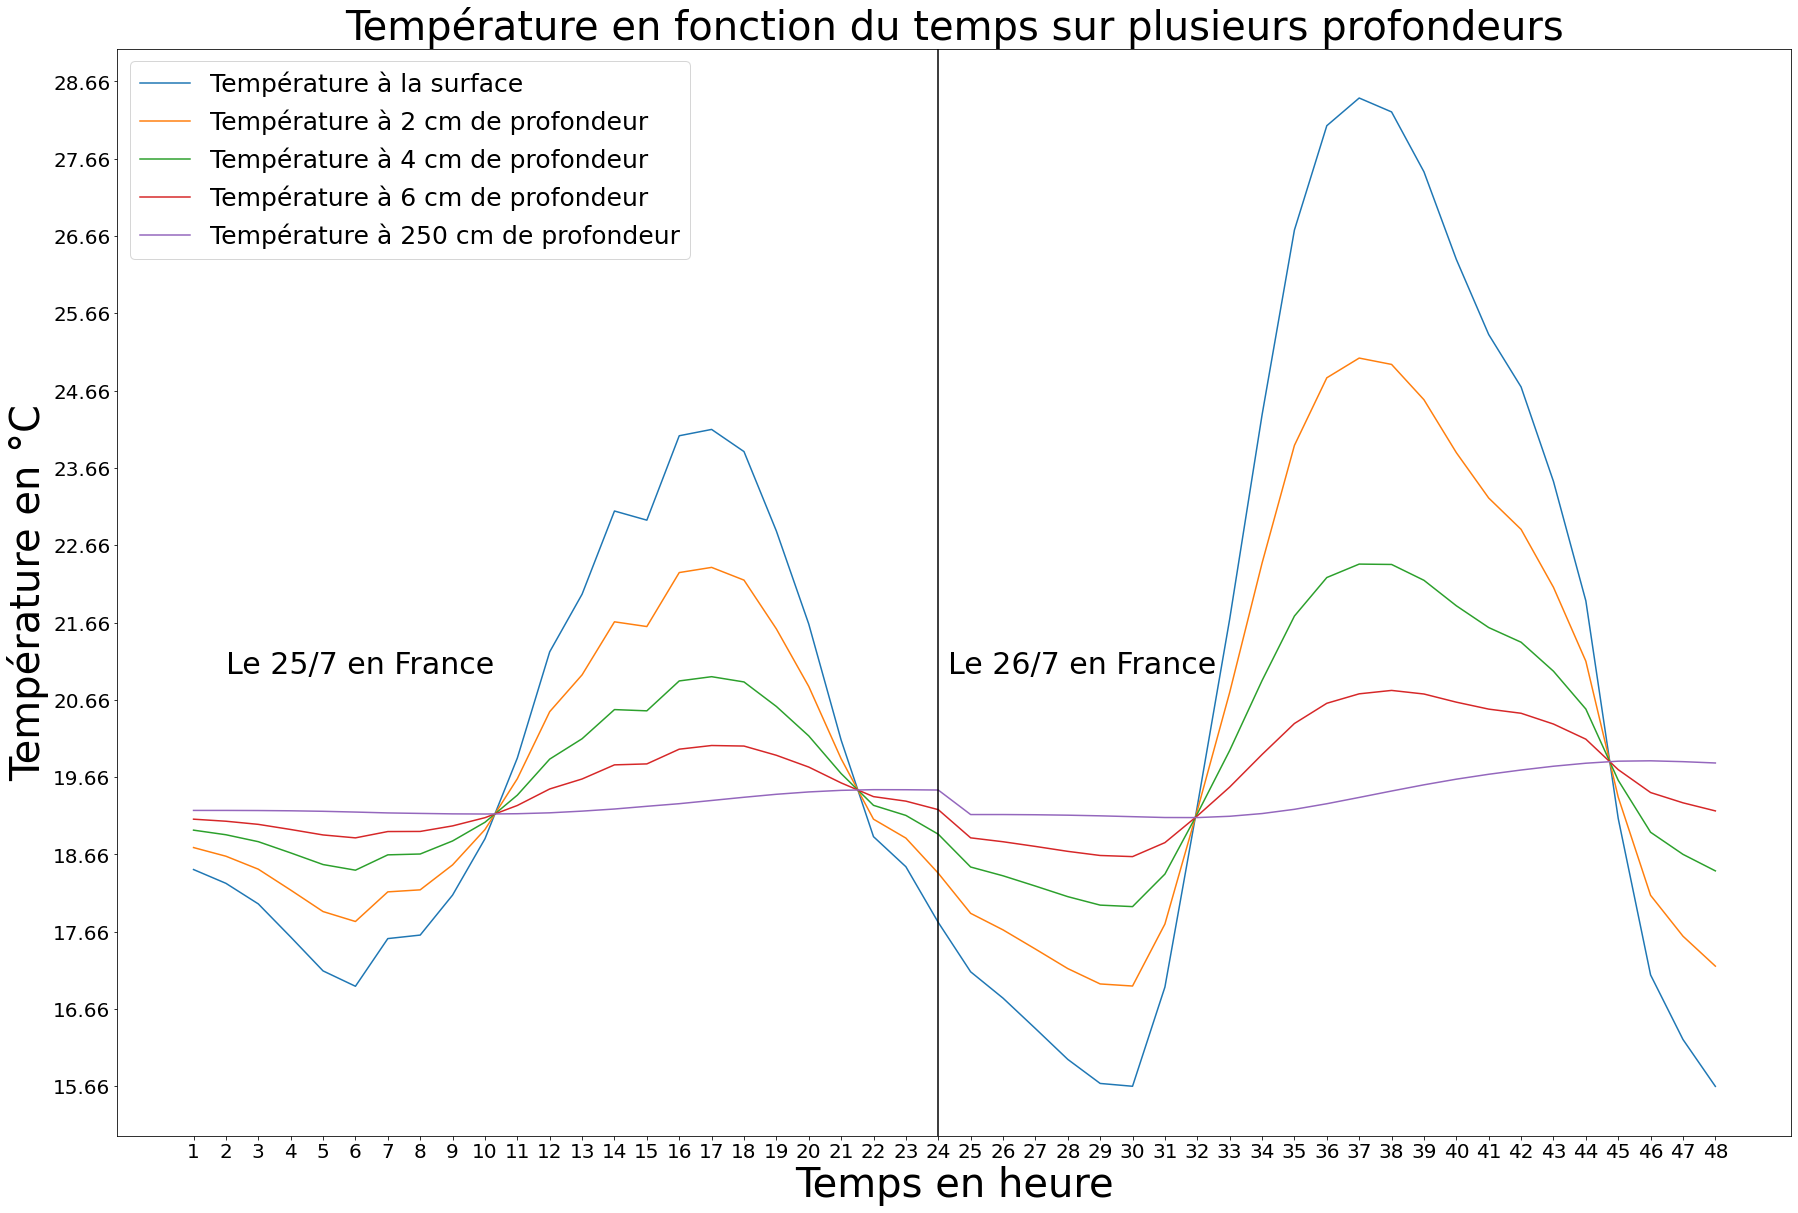

In [45]:
#Affichage
#x axis
time = [i for i in range(1,49)]
#Plot
fig = plt.figure(figsize=(30,20))
plt.plot(time, temp_0_cm, label="Température à la surface")
plt.plot(time, temp_2_cm,label="Température à 2 cm de profondeur")
plt.plot(time, temp_4_cm,label="Température à 4 cm de profondeur")
plt.plot(time, temp_6_cm,label="Température à 6 cm de profondeur")
plt.plot(time, temp_250_cm,label="Température à 250 cm de profondeur")
plt.xticks(np.arange(min(time), max(time)+1, 1.0))
plt.yticks(np.arange(min(temp_0_cm), max(temp_0_cm)+1, 1.0))
ax.tick_params(labelsize=40)
plt.legend(prop={'size': 25})
plt.xlabel('Temps en heure',fontsize=40)
plt.ylabel('Température en °C',fontsize=40)
plt.title("Température en fonction du temps sur plusieurs profondeurs ver. numérique",fontsize=40)
plt.text(2, 21,f"Le {jour}/{mois} en {pays}",fontsize=30)
plt.text(24.3, 21,f"Le {jour+1}/{mois} en {pays}",fontsize=30)
plt.axvline(x=24.0,color='k')
plt.savefig('Graphe_profondeur_num.png',bbox_inches='tight')

Maintenant on s'attaque à la résolution analytique, pour voir si celle-ci correspond à la résolution numérique. 

In [183]:
#Résolution analytique 

#On fixe les paramètres de l'équation 
periode = 3600*24
omega = (2*np.pi)/periode
#Jours/mois
jour = 25
mois = 7
#Pays
pays = "France"

def ana_days(pays,mois,jour,periode,omega,D):
    
    #liste des heures de ce jour
    l_jours = list_days[pays][dict_months[mois]][jour]
    
    #détermination des min/max sur le cycle pour le calcul de t0
    min_ = min(l_jours)
    max_ = max(l_jours)
    
    #détermination de t0
    t0 = max(max_-np.mean(l_jours),np.mean(l_jours)-min_)
    
    #Matrice stockant le résultat
    T = np.zeros((5,24),float) #car 5 profondeurs pour chaque heure d'une journée
    
    #liste des profondeurs
    x = [0.0,0.02,0.04,0.06,2.5]
    
    #liste temporel
    t = [float(i*3600) for i in range(1,25)]
    
    for i in range(0,5):
        for j in range(0,24):
            ti = l_jours[0]
            T[i][j] = ti - t0*math.exp(-math.sqrt(omega/(2*D))*x[i])*np.cos((omega*t[j])-(math.sqrt(omega/(2*D))*x[i]))
            
    return T 

In [184]:
#Calcul pour un jour
res_ana = ana_days(pays,mois,jour,periode,omega,D_Fr)
res_ana_2 = ana_days(pays,mois,jour+1,periode,omega,D_Fr)

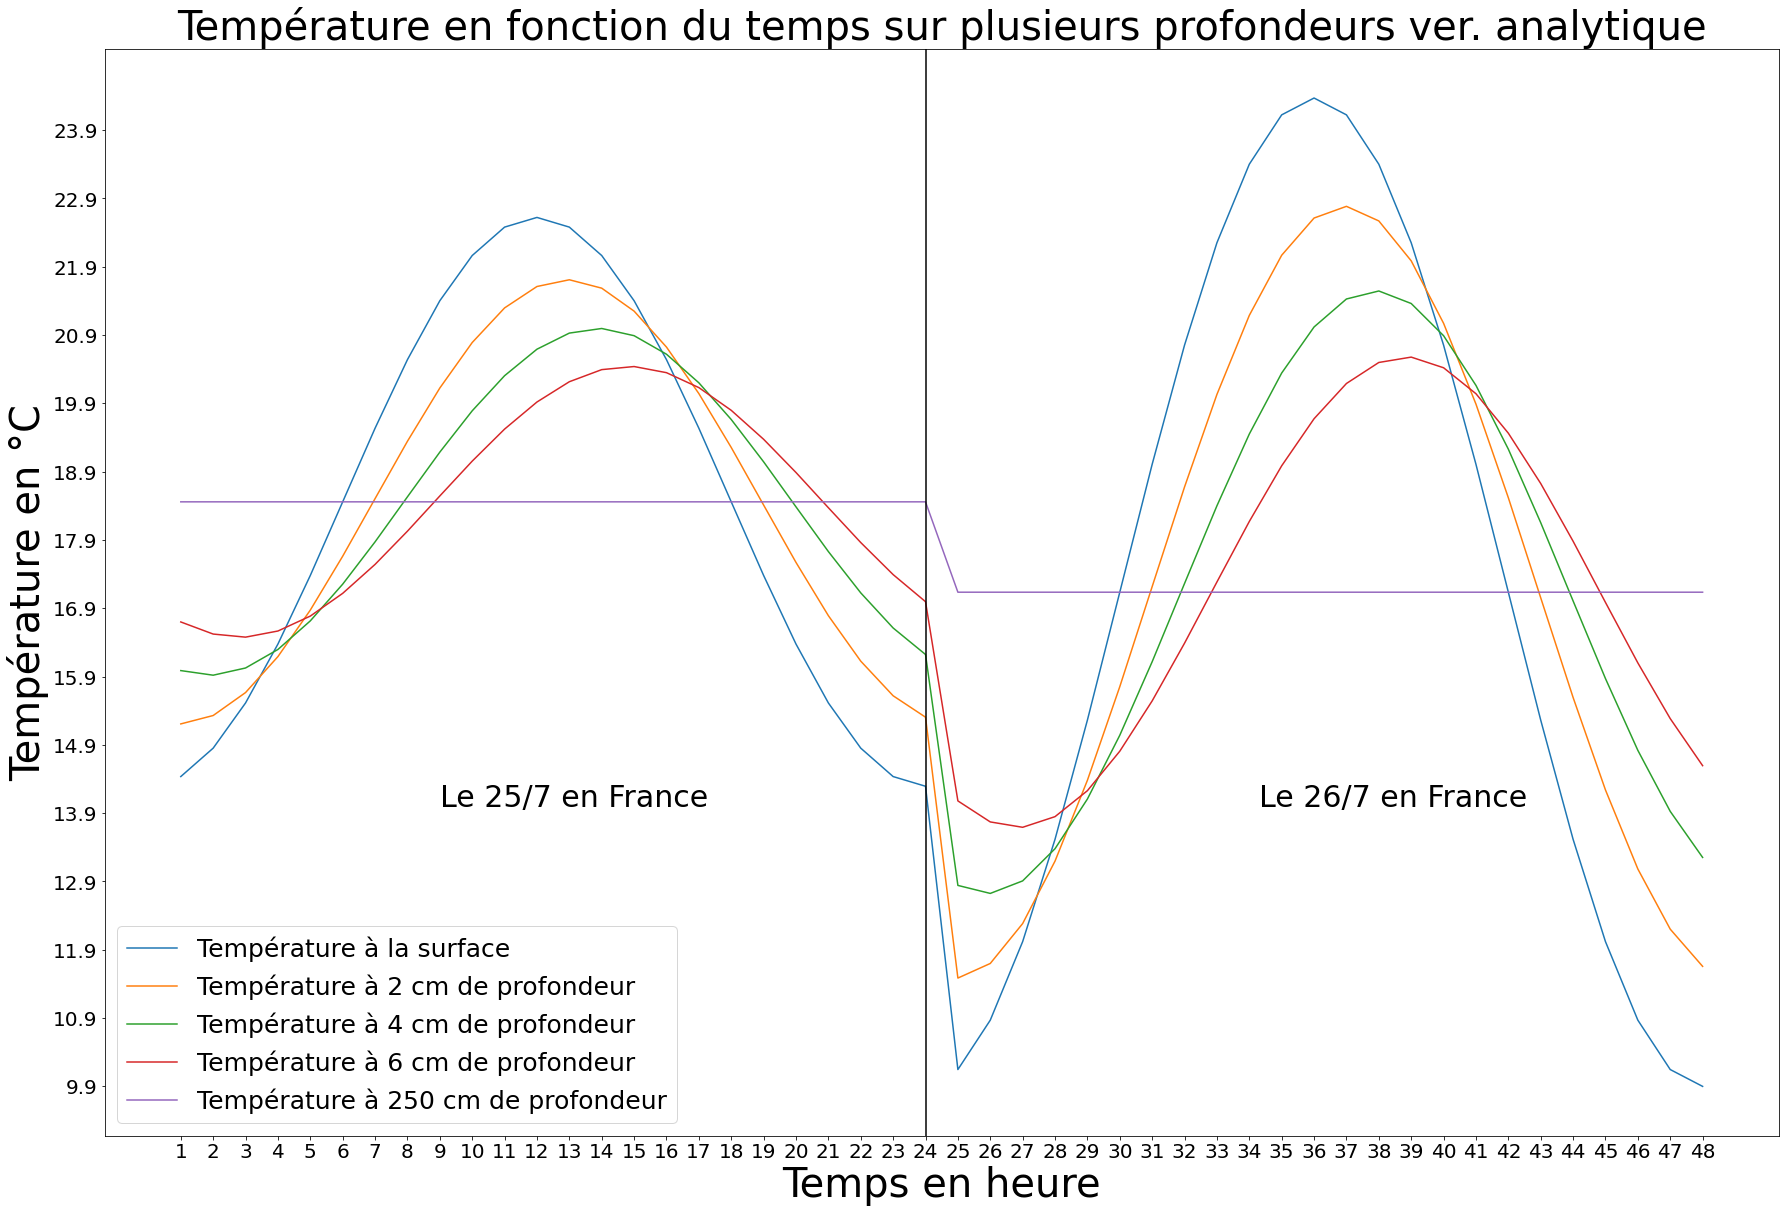

In [188]:
#On vide les listes de stockages
temp_0_cm.clear()
temp_2_cm.clear()
temp_4_cm.clear()
temp_6_cm.clear()
temp_250_cm.clear()

#X-axis
time = [i for i in range(1,49)]

#Y-axis
temp_0_cm = []
temp_2_cm = []
temp_4_cm = []
temp_6_cm = []
temp_250_cm = []

temp_0_cm = res_ana[0].tolist() + res_ana_2[0].tolist()
temp_2_cm = res_ana[1].tolist() + res_ana_2[1].tolist()
temp_4_cm = res_ana[2].tolist() + res_ana_2[2].tolist()
temp_6_cm = res_ana[3].tolist() + res_ana_2[3].tolist()
temp_250_cm = res_ana[4].tolist() + res_ana_2[4].tolist()

#Plot
fig = plt.figure(figsize=(30,20))
plt.plot(time, temp_0_cm, label="Température à la surface")
plt.plot(time, temp_2_cm,label="Température à 2 cm de profondeur")
plt.plot(time, temp_4_cm,label="Température à 4 cm de profondeur")
plt.plot(time, temp_6_cm,label="Température à 6 cm de profondeur")
plt.plot(time, temp_250_cm,label="Température à 250 cm de profondeur")
plt.xticks(np.arange(min(time), max(time)+1, 1.0))
plt.yticks(np.arange(min(min(temp_0_cm),min(temp_2_cm),min(temp_4_cm),min(temp_6_cm),min(temp_250_cm)),max(max(temp_0_cm),max(temp_2_cm),max(temp_4_cm),max(temp_6_cm),max(temp_250_cm)),1.0))
ax.tick_params(labelsize=40)
plt.legend(prop={'size': 25})
plt.xlabel('Temps en heure',fontsize=40)
plt.ylabel('Température en °C',fontsize=40)
plt.title("Température en fonction du temps sur plusieurs profondeurs ver. analytique",fontsize=40)
plt.text(9, 14,f"Le {jour}/{mois} en {pays}",fontsize=30)
plt.text(34.3, 14,f"Le {jour+1}/{mois} en {pays}",fontsize=30)
plt.axvline(x=24.0,color='k')
plt.savefig('Graphe_profondeur_ana.png',bbox_inches='tight')